In [2]:
#pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   --- ----------------------------------- 61.4/626.3 kB 812.7 kB/s eta 0:00:01
   ------------------------------ --------- 471.0/626.3 kB 4.2 MB/s eta 0:00:01
   ------------------------------------- -- 583.7/626.3 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------  614.4/626.3 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from textblob import TextBlob
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import emoji

In [2]:
df = pd.read_csv(r"C:\Users\laxmi\Downloads\mental_hlth (1).csv")

In [3]:
df

,Unnamed: 0,statement,status
0,73,urmi has a fever i m already sad and restless...,Anxiety
1,52588,the girl i like also suffers from anxiety the...,Anxiety
2,28359,people say follow your gut but i don t even ...,Stress
3,22154,i am just an average looking female i guess n...,Suicidal
4,44815,contendo shit that s horrible poor kid,Normal
...,...,...,...
9995,31804,i need a notebook,Normal
9996,30576,it was the best game ever,Normal
9997,18201,i feel like i deserve to suffer i fucking hat...,Suicidal
9998,13888,showing emotion makes you gay so naturally i ...,Depression


In [4]:
#df = df.drop(["Unnamed: 0"], axis = 1)

In [5]:
df

,Unnamed: 0,statement,status
0,73,urmi has a fever i m already sad and restless...,Anxiety
1,52588,the girl i like also suffers from anxiety the...,Anxiety
2,28359,people say follow your gut but i don t even ...,Stress
3,22154,i am just an average looking female i guess n...,Suicidal
4,44815,contendo shit that s horrible poor kid,Normal
...,...,...,...
9995,31804,i need a notebook,Normal
9996,30576,it was the best game ever,Normal
9997,18201,i feel like i deserve to suffer i fucking hat...,Suicidal
9998,13888,showing emotion makes you gay so naturally i ...,Depression


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   statement   10000 non-null  object
 2   status      10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [7]:
df[df['statement'].isna()][['statement', 'status']]

,statement,status


In [8]:
df['statement'][40000]

KeyError: 40000

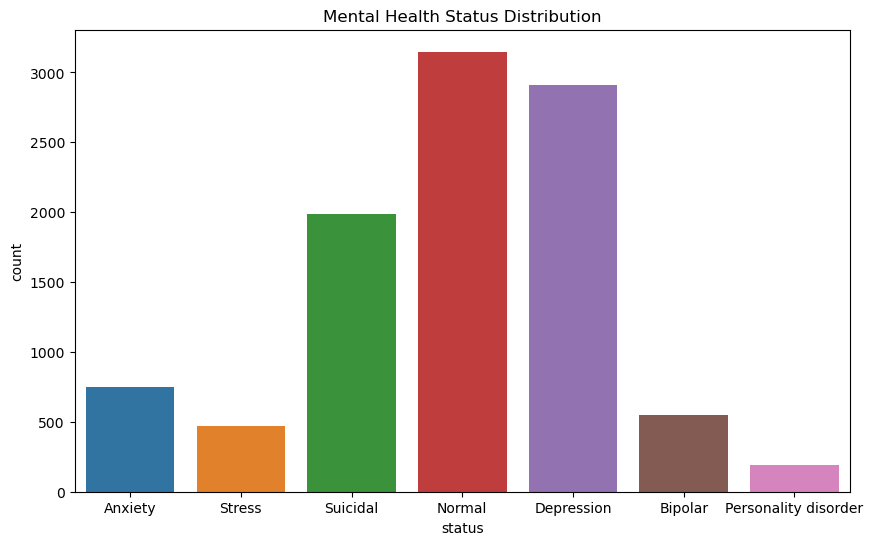

In [10]:
## mental health distribution

plt.figure(figsize= (10, 6))
plt.title('Mental Health Status Distribution')
sns.countplot(x=df['status'])
plt.show()

In [11]:
df.dropna(inplace = True)

In [12]:
df[df['statement'].isna()][['statement', 'status']]

,statement,status


In [13]:
df['statement'].str.lower()

0       urmi has a fever  i m already sad and restless...
1       the girl i like also suffers from anxiety  the...
2       people say  follow your gut  but i don t even ...
3       i am just an average looking female i guess  n...
4                  contendo shit that s horrible poor kid
                              ...                        
9995                                   i need a notebook 
9996                           it was the best game ever 
9997    i feel like i deserve to suffer  i fucking hat...
9998    showing emotion makes you gay  so naturally i ...
9999    at some point in the past year  we discussed l...
Name: statement, Length: 10000, dtype: object

In [14]:
df

,Unnamed: 0,statement,status
0,73,urmi has a fever i m already sad and restless...,Anxiety
1,52588,the girl i like also suffers from anxiety the...,Anxiety
2,28359,people say follow your gut but i don t even ...,Stress
3,22154,i am just an average looking female i guess n...,Suicidal
4,44815,contendo shit that s horrible poor kid,Normal
...,...,...,...
9995,31804,i need a notebook,Normal
9996,30576,it was the best game ever,Normal
9997,18201,i feel like i deserve to suffer i fucking hat...,Suicidal
9998,13888,showing emotion makes you gay so naturally i ...,Depression


In [15]:
def eda(data,column):
    count = 0
    count = data[column].apply(lambda x: count + emoji.emoji_count(x)).sum()  #emoji count in the data
    upper =data[column].str.isupper().sum()
    url = data[column].apply(lambda x:   True  if re.search(r'www.\S+ | https?://\S+',x)  else False).sum()
    tags = data[column].apply(lambda x:   True  if re.search(r'<[^>]>+',x)  else False).sum()
    marks = data[column].apply(lambda x:   True  if re.search(r'[^a-zA-Z0-9 ]',x)  else False).sum()
    digits = data[column].apply(lambda x:   True  if re.search(r'[0-9]',x)  else False).sum()
    return  pd.Series({'Emoji':count,"upper case":upper,"urls" : url,"HTML tags":tags,'Punctuaton':marks,'Digits':digits})

In [16]:
df['statement'] = df['statement'].apply(lambda x : emoji.demojize(x).replace(':',''))

In [17]:
df['statement'] = df['statement'].str.lower()

In [18]:
df['statement'] = df['statement'].apply(lambda x :re.sub(r'www.\S+ | https?://\S+', ' ' ,x))

In [19]:
df['statement'] = df['statement'].apply(lambda x :re.sub(r'[^a-zA-Z0-9 ]',' ' ,x))

In [20]:
df['statement'] = df['statement'].apply(lambda x :re.sub(r'[0-9]',' ' ,x))

In [21]:
eda(df,'statement')

Emoji         0
upper case    0
urls          0
HTML tags     0
Punctuaton    0
Digits        0
dtype: int64

In [22]:
##df.to_csv('Mntl_Health.csv')

In [23]:
## import os
## os.getcwd()

# Bag of Words(Count of words)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
bow = CountVectorizer(stop_words='english', max_features=10000)  

In [26]:
bow.fit(df['statement'])
X = bow.transform(df['statement'])
y = df['status']

In [27]:
bow.vocabulary_

{'fever': 3086,
 'sad': 7433,
 'restless': 7201,
 'little': 4880,
 'girl': 3468,
 'ha': 3643,
 'like': 4830,
 'suffers': 8497,
 'anxiety': 354,
 'fell': 3069,
 'years': 9936,
 'ago': 206,
 'haven': 3726,
 'got': 3528,
 'guts': 3638,
 'let': 4779,
 'know': 4610,
 'feel': 3062,
 'recently': 6873,
 'developed': 2189,
 'agoraphobia': 209,
 've': 9407,
 'improving': 4086,
 'travel': 9051,
 'far': 3013,
 'kind': 4571,
 'demoralized': 2087,
 'question': 6678,
 'relationship': 7009,
 'work': 9832,
 'suffer': 8492,
 'people': 6064,
 'say': 7500,
 'follow': 3228,
 'gut': 3637,
 'don': 2410,
 'feeling': 3063,
 'anymore': 359,
 'exhaustion': 2866,
 'told': 8935,
 'really': 6842,
 'big': 781,
 'deal': 1991,
 'long': 4940,
 'run': 7400,
 'feels': 3066,
 'absolutely': 23,
 'monumental': 5347,
 'affecting': 178,
 'rest': 7193,
 'life': 4809,
 'relate': 7003,
 'make': 5043,
 'tough': 8978,
 'lifelong': 4813,
 'decisions': 2019,
 'thank': 8766,
 'just': 4515,
 'average': 571,
 'looking': 4950,
 'female'

In [28]:
df1 = df.sample(10000)

In [29]:
df1.to_csv('mental_hlth.csv')

In [30]:
X = bow.fit_transform(df1['statement'])
y = df1['status']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

# KNN

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.4845

## Naive Bayes

In [34]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test,y_pred)

0.638

# Decssion Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.6225

# Support Vector Classifier

In [36]:
# from sklearn.svm import SVC
# sv = SVC()
# sv.fit(X_train,y_train)
# y_pred = sv.predict(X_test)
# accuracy_score(y_test,y_pred)

In [37]:
import pickle

In [38]:
pickle.dump(nb,open("mh.pkl","wb"))  # writing as a binary format

In [39]:
model = pickle.load(open("mh.pkl","rb"))

In [40]:
pickle.dump(bow,open("bow1.pkl","wb"))  # writing as a binary format

In [41]:
bow = pickle.load(open("bow1.pkl","rb"))

In [42]:
df1

,Unnamed: 0,statement,status
7202,41115,femibello you think mourinho wasn t depressed ...,Depression
9051,33128,boy i m glad that job is finished,Normal
9947,36421,olimould lewis,Normal
2975,37752,typical feeling at bedtime this is a good a it...,Depression
6254,32923,i have to be there two hours early,Normal
...,...,...,...
250,18415,i lashed out on a friend for not texting back ...,Depression
4852,22773,is it easy to get recovery i am fairly sure i...,Suicidal
3224,34965,worried about colon cancer again hey all l...,Anxiety
1729,47806,i don t know how to unpack it all at this poin...,Depression


In [43]:
df['statement'][31804]

KeyError: 31804

In [ ]:
df['statement'][13888]

In [ ]:
df['statement'][29516]

In [ ]:
df['statement'][18201]

In [44]:
df

,Unnamed: 0,statement,status
0,73,urmi has a fever i m already sad and restless...,Anxiety
1,52588,the girl i like also suffers from anxiety the...,Anxiety
2,28359,people say follow your gut but i don t even ...,Stress
3,22154,i am just an average looking female i guess n...,Suicidal
4,44815,contendo shit that s horrible poor kid,Normal
...,...,...,...
9995,31804,i need a notebook,Normal
9996,30576,it was the best game ever,Normal
9997,18201,i feel like i deserve to suffer i fucking hat...,Suicidal
9998,13888,showing emotion makes you gay so naturally i ...,Depression
